<a href="https://colab.research.google.com/github/juansokil/Deep_Learning/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [0]:
###Generador de Imagenes###
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest', validation_split=0.2)

In [0]:
###debo cargar una carpeta entera###
train_generator = train_datagen.flow_from_directory(
        '/mnt/c/Source/deep_learning/partidos_politicos/train/',
        batch_size=32,
        target_size=(200, 200),
        color_mode = 'rgb', subset='training')

validation_generator = train_datagen.flow_from_directory(
        '/mnt/c/Source/deep_learning/partidos_politicos/train/',
        batch_size=32,
        target_size=(200, 200),
        color_mode = 'rgb', subset='validation')


Found 3041 images belonging to 3 classes.
Found 759 images belonging to 3 classes.


Este analisis busca clasificar las imagenes.

In [0]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import MaxPooling2D
from keras.layers import Input, Flatten
from keras import optimizers
from keras.layers.convolutional import Conv2D
from keras.layers import Dropout

#The process of building a Convolutional Neural Network always involves four major steps.
#Step - 1 : Convolution
#Step - 2 : Pooling
#Step - 3 : Flattening
#Step - 4 : Full connection

model = models.Sequential()
###El input shape es la cantidad pixels, el 3 sirve cuando es RGB###
#### 32 es la cantidad de neuronas###
####kernel_size 3x3 es lo más frecuente, se puede usar 5x5###
model.add(Conv2D(32, (3,3), input_shape = (200, 200, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(16, (3, 3), strides=(2, 2)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(8, (3, 3), strides=(2, 2)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 49, 49, 16)        4624      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 8)         1160      
__________

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

H=model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50)


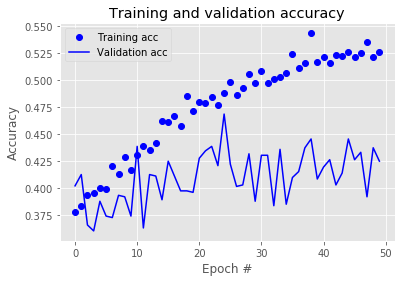

In [0]:
import matplotlib.pyplot as plt

acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.style.use("ggplot")
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


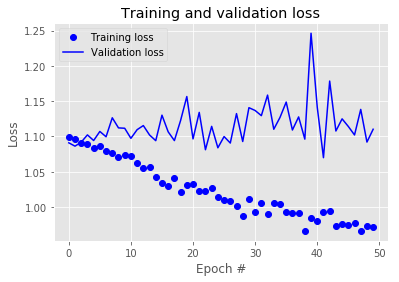

In [0]:

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()
#plt.savefig("plot.png")

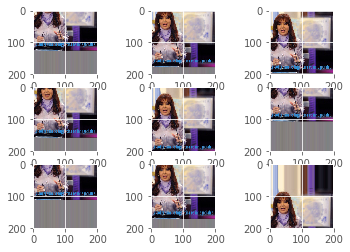

In [0]:
###DATA AUGMENTATION###

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = image.load_img('/mnt/c/Source/deep_learning/partidos_politicos/train/cristinafkirchner/1661514_293862980821851_1441642839_n.jpg', target_size = (200, 200))
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint32')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()


In [0]:
from numpy import expand_dims
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

img = image.load_img('/mnt/c/Source/deep_learning/partidos_politicos/train/cristinafkirchner/1661514_293862980821851_1441642839_n.jpg', target_size = (200, 200))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims (img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)




(1, 200, 200, 3)


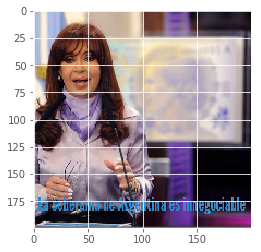

In [0]:
pyplot.imshow(img)

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 198, 198, 32)


<function matplotlib.pyplot.show(*args, **kw)>

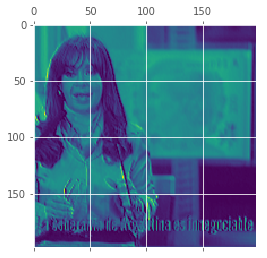

In [0]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show

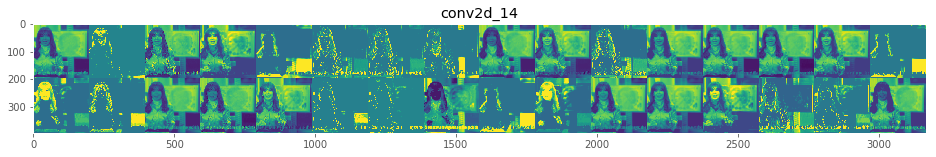

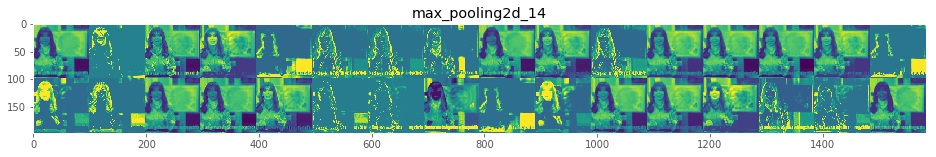

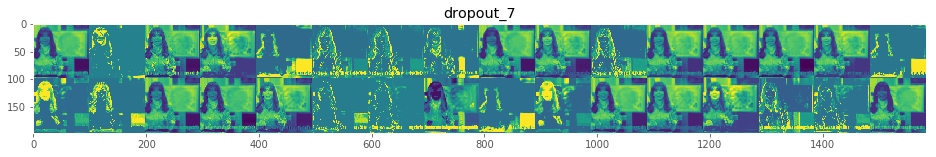

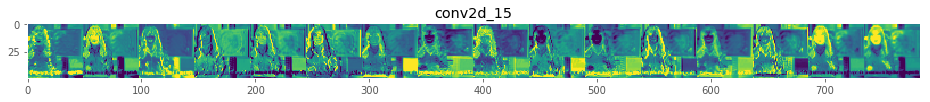

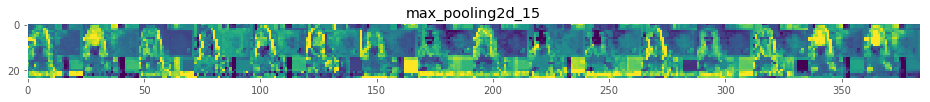

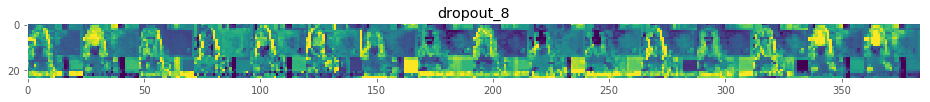

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

In [0]:
import keras

# Imprimimos todas las activaciones 

# Usamos los nombres de las capas para el plot
# De cada model.layers guardamos el layer.name

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Ahora veamos nuestros feature maps
# Iteramos las activaciones y los layer_names
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    # Shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # Matriz para mostrar las activaciones
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            
            # Postprocesado para mejorar la estetica
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()